# Model `IP`

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1997
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


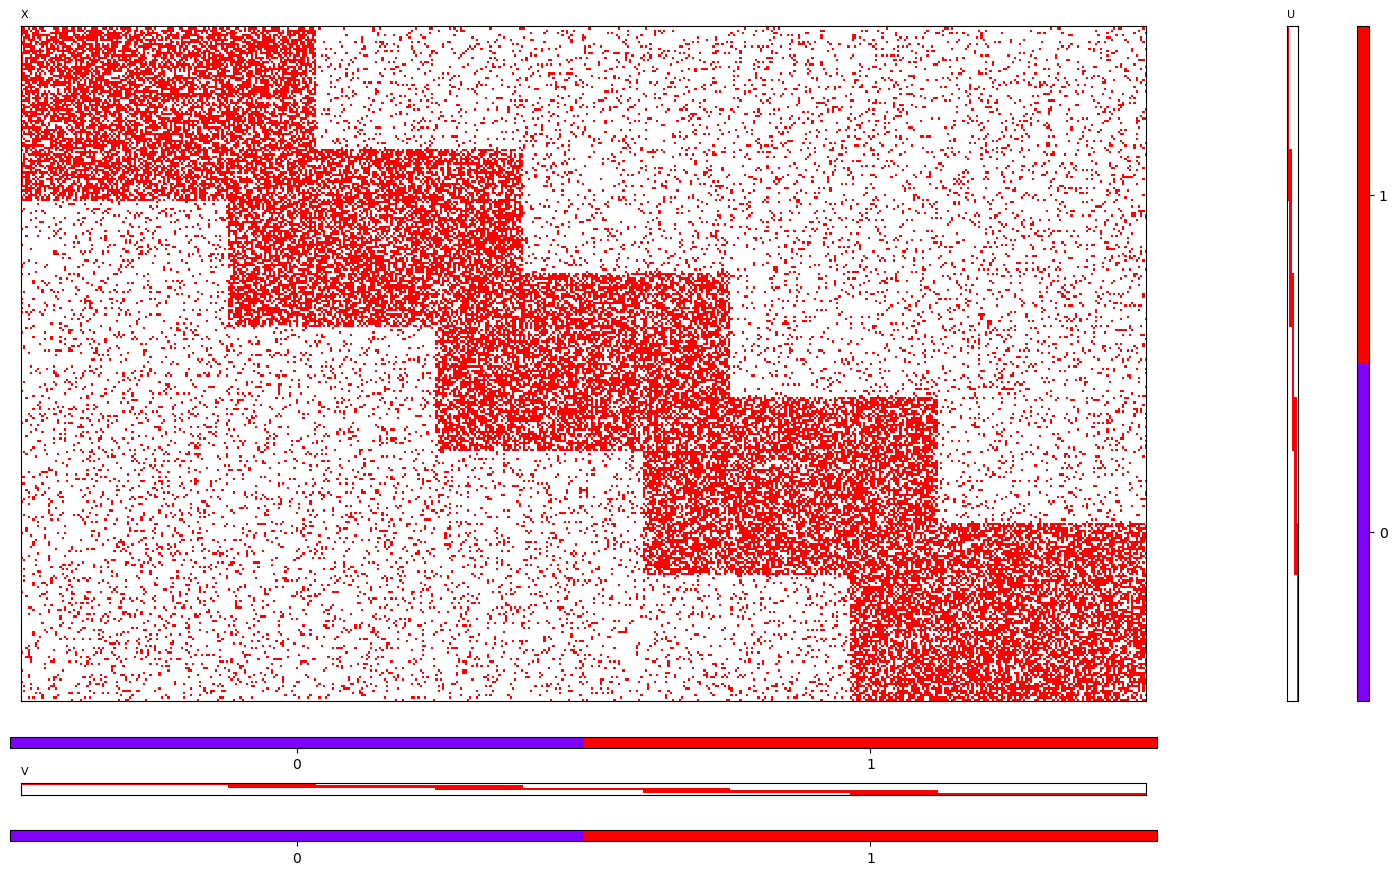

<Figure size 640x480 with 0 Axes>

In [3]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.3])
data.generate(seed=1997)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [4]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [5]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

# split.negative_sample(size=split.pos_size, type="popularity", seed=2023)

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1720598798
[I]   train_size   : 41003
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1720598798


27635


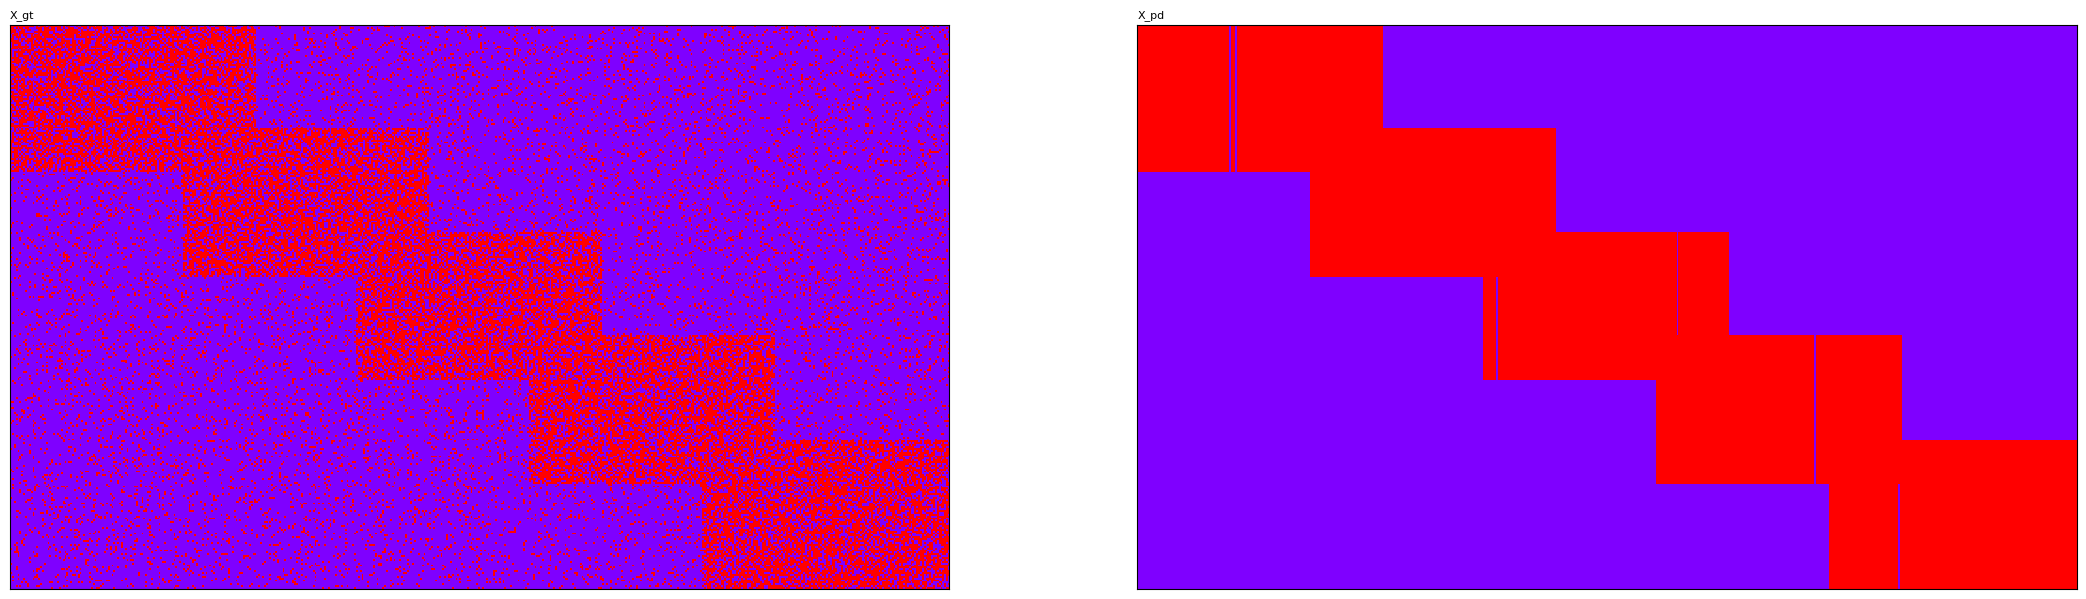



Solving MLP(1) via column generation


At iteration 1, at 0 sec
The RMLP objective is:							28945.00004
The bound on MLP is:							0.00000
The optimality gap for MLP is:					100.00
The number of columns in RMLP is:				5 

The heuristic pricing problem objective is:		-375.96171


At iteration 2, at 1 sec
The RMLP objective is:							28945.00017
The bound on MLP is:							0.00000
The optimality gap for MLP is:					100.00
The number of columns in RMLP is:				7 

The heuristic pricing problem objective is:		-412.70092


At iteration 3, at 1 sec
The RMLP objective is:							28945.00000
The bound on MLP is:							0.00000
The optimality gap for MLP is:					100.00
The number of columns in RMLP is:				9 

The heuristic pricing problem objective is:		-362.30898


At iteration 4, at 2 sec
The RMLP objective is:							28945.00048
The bound on MLP is:							0.00000
The optimality gap for MLP is:					100.00
The number of columns in RMLP is:				11 

The heuristic pricing problem objective is:		-22

<Figure size 640x480 with 0 Axes>

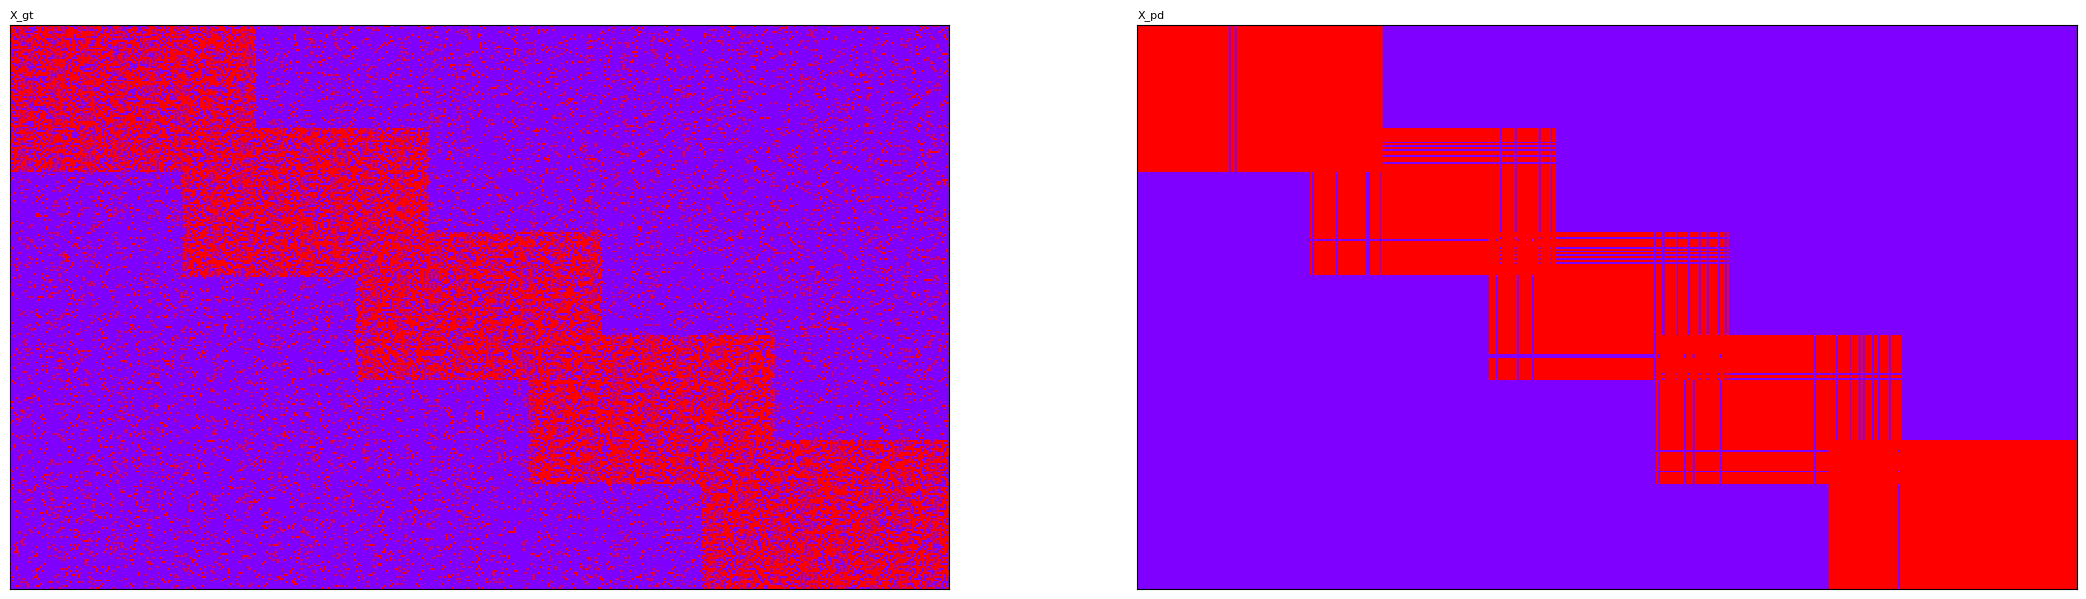

<Figure size 640x480 with 0 Axes>

In [13]:
from models.bmf_ip_kovacs.BMF import *
from utils import to_dense, show_matrix

k = 5
X = to_dense(X_train)
# X = random_binary_matrix(20, 10, 10, 0.5, 0, 0)

A_greedy, B_greedy = None, None
A_greedy, B_greedy = BMF_k_greedy_heur(X, k)
X_pd = boolean_matrix_product(A_greedy, B_greedy)
print(np.sum(np.abs(X - X_pd)))
show_matrix([(X, [0, 0], 'X_gt'), (X_pd, [0, 1], 'X_pd')])


cg = BMF_via_CG(X, k, A_init=A_greedy, B_init=B_greedy)
cg.preprocess_input_matrices()
cg.MLP_solve(max_time=20)

cg.MIP_solve(max_time=10)

cg.post_process_output_matrices()
A_MIP1 = cg.A
B_MIP1 = cg.B
X_pd = boolean_matrix_product(A_MIP1, B_MIP1)
print(np.sum(np.abs(X - X_pd)))
show_matrix([(X, [0, 0], 'X_gt'), (X_pd, [0, 1], 'X_pd')])

In [9]:
A_MIP1

array([], shape=(300, 0), dtype=int32)

[I] k            : 5
[I] W            : full
[I] prior_u      : 0.5
[I] prior_v      : 0.5
[I] channel_pos  : 0.99
[I] channel_neg  : 0.99
[I] tol          : 0.0001
[I] max_iter     : 500
[I] lr           : 0.2
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.


[I] diff: 3.907453: 100%|██████████| 500/500 [00:49<00:00, 10.00it/s]


[W] Timer not started.
[I] model saved as: 24-07-09_05-37-41_MessagePassing.pickle


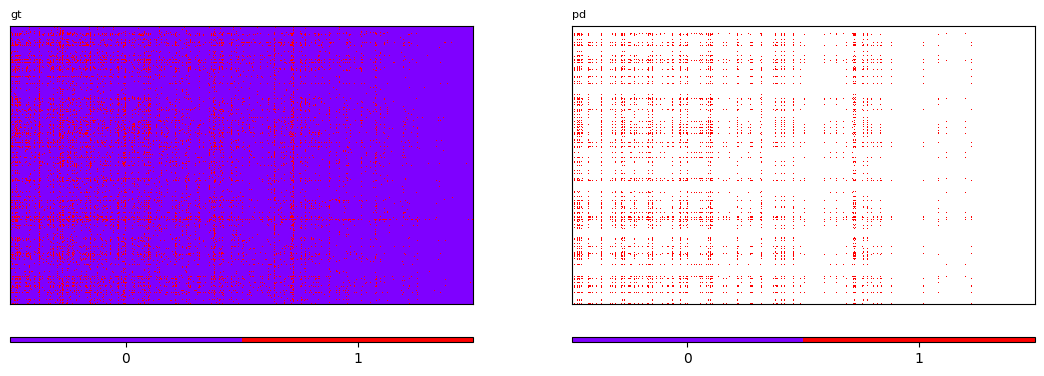

train                             
                            0                             
                time   Recall Precision Accuracy        F1
0  09/07/24 05:37:41  0.33104  0.724166    0.943  0.454371

<Figure size 640x480 with 0 Axes>

In [ ]:
from models import MessagePassing

k = 5
W = 'full'

model = MessagePassing(k=k, W=W)
model.fit(X_train=X_train, task='reconstruction', verbose=True)